## Optimization: Preprocessing

In [56]:
#  import dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [28]:
#  import data
apps_df = pd.read_csv('Resources\charity_data.csv')
apps_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [29]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
apps_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
apps_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [30]:
apps_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [31]:
app_counts = apps_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [32]:
# raised the cutoff value to reduce number of application types 
app_types_to_replace = list(app_counts[app_counts < 1000].index)

for app in app_types_to_replace:
    apps_df['APPLICATION_TYPE'] = apps_df['APPLICATION_TYPE'].replace(app,"Other")

apps_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [33]:
class_counts = apps_df['CLASSIFICATION'].value_counts()
class_counts[class_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C4100        6
C1720        6
C1600        5
C1257        5
C1260        3
C0           3
C2710        3
C1234        2
C1246        2
C1256        2
C3200        2
C1267        2
Name: CLASSIFICATION, dtype: int64

In [34]:
class_to_replace = list(class_counts[class_counts < 1000].index)

for cl in class_to_replace:
    apps_df['CLASSIFICATION'] = apps_df['CLASSIFICATION'].replace(cl,"Other")

apps_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [35]:
apps_dummies_df = pd.get_dummies(apps_df)
apps_dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
# split data into features and targets
X = apps_dummies_df.drop(['IS_SUCCESSFUL'], axis=1)
y = apps_dummies_df['IS_SUCCESSFUL']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# create a scaler and fit to the training data, then scale the data
scaler = StandardScaler()

X_scaler_train = scaler.fit(X_train)

X_train_scaled = X_scaler_train.transform(X_train)
X_test_scaled = X_scaler_train.transform(X_test)

## Optimization: Compile, Train and Evaluate Model

In [38]:
# define the neural network model
feature_count = len(X_train_scaled[0])
# adjust the number of nodes in the hidden layers
node_count = int(feature_count * 2.5)
node_count_2 = int(feature_count * 1.5)

nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='relu', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='relu'))

# check structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
Total params: 10,160
Trainable params: 10,160
Non-trainable params: 0
_________________________________________________________________


Increased the number of parameters from 7731 to 10160.

In [39]:
# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=100)

Increasing the number of parameters drastically lowered the model's accuracy, we need to try something else.

In [41]:
# examine the dataset to see if other features can be binned
for col in apps_df.columns:
    print(apps_df[col].value_counts())

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64
N    342

In [43]:
#  drop the ask amount column because of how much it is skewed
apps_df.drop(['ASK_AMT'], axis=1, inplace=True)
apps_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [45]:
# bin the income amount column
income_counts = apps_df['INCOME_AMT'].value_counts()

incomes_to_replace = ['5M-10M','10M-50M', '10M-50M', '50M+']

for income in incomes_to_replace:
    apps_df['INCOME_AMT'] = apps_df['INCOME_AMT'].replace(income,"Other")

apps_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [46]:
optimize_dummies_df = pd.get_dummies(apps_df)
optimize_dummies_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
# split data into features and targets
X = optimize_dummies_df.drop(['IS_SUCCESSFUL'], axis=1)
y = optimize_dummies_df['IS_SUCCESSFUL']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# create a StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# define the neural network model
feature_count = len(X_train_scaled[0])
node_count = 90
node_count_2 = 45
nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='relu', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='relu'))

# output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# check structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 90)                3690      
                                                                 
 dense_6 (Dense)             (None, 45)                4095      
                                                                 
 dense_7 (Dense)             (None, 1)                 46        
                                                                 
Total params: 7,831
Trainable params: 7,831
Non-trainable params: 0
_________________________________________________________________


Increased the number of neurons per layer.

In [49]:
# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
# train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5712 - accuracy: 0.7237
Epoch 2/100
858/858 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7292
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7312
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7314
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7329
Epoch 6/100
858/858 [==============================] - 1s 873us/step - loss: 0.5510 - accuracy: 0.7328
Epoch 7/100
858/858 [==============================] - 1s 900us/step - loss: 0.5500 - accuracy: 0.7334
Epoch 8/100
858/858 [==============================] - 1s 894us/step - loss: 0.5496 - accuracy: 0.7337
Epoch 9/100
858/858 [==============================] - 1s 925us/step - loss: 0.5490 - accuracy: 0.7325
Epoch 10/100
858/858 [==============================] - 1s 937us/step - loss: 0.548

In [51]:
#  evaluate the model
model_loss, model_acc = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f'Model loss: {model_loss:.4f}, accuracy: {model_acc:.4f}')

215/215 - 0s - loss: 0.5692 - accuracy: 0.7273 - 202ms/epoch - 938us/step
Model loss: 0.5692, accuracy: 0.7273


Binning the income amount got nearly the same results as the original model, so next I will try to improve accuracy by adding another hidden layer to the neural network.

In [52]:
# define the new neural network model
feature_count = len(X_train_scaled[0])
node_count = 100
node_count_2 = 50
node_count_3 = 25
nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='relu', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='relu'))
# third hidden layer
nn.add(tf.keras.layers.Dense(node_count_3, activation='relu'))

# output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [53]:
# compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
#  train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5696 - accuracy: 0.7234: 0s - loss: 0.581
Epoch 2/100
858/858 [==============================] - 1s 993us/step - loss: 0.5566 - accuracy: 0.7295
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7311
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7320
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7326
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7326
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7337
Epoch 8/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5499 - accuracy: 0.7321
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7336
Epoch 10/100
858/858 [==============================] - 1s 1ms/step - l

<AxesSubplot:>

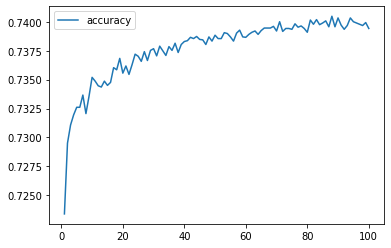

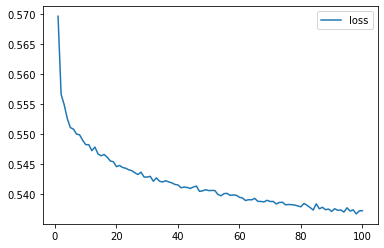

In [61]:
history_df = pd.DataFrame(model_fit.history)
history_df.index += 1

history_df.plot(y='accuracy')
history_df.plot(y='loss')

In [55]:
#  evaluate the model
model_loss, model_acc = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f'Model loss: {model_loss:.4f}, accuracy: {model_acc:.4f}')

215/215 - 0s - loss: 0.5808 - accuracy: 0.7277 - 265ms/epoch - 1ms/step
Model loss: 0.5808, accuracy: 0.7277


More layers brought the performance up by a little bit. Next I will try a different activation function.

In [62]:
feature_count = len(X_train_scaled[0])
node_count = 90
node_count_2 = 50
nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='sigmoid', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='sigmoid'))

# output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# check structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 90)                3690      
                                                                 
 dense_13 (Dense)            (None, 50)                4550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,291
Trainable params: 8,291
Non-trainable params: 0
_________________________________________________________________


In [63]:
#  compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 1s 933us/step - loss: 0.5943 - accuracy: 0.7073
Epoch 2/100
858/858 [==============================] - 1s 971us/step - loss: 0.5765 - accuracy: 0.7209
Epoch 3/100
858/858 [==============================] - 1s 964us/step - loss: 0.5699 - accuracy: 0.7229
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5648 - accuracy: 0.7251
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7258
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7285
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5574 - accuracy: 0.7294
Epoch 8/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7295
Epoch 9/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7307
Epoch 10/100
858/858 [==============================] - 1s 985us/step - loss: 0.5544 

In [65]:
#  evaluate the model
model_loss, model_acc = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f'Model loss: {model_loss:.4f}, accuracy: {model_acc:.4f}')

215/215 - 0s - loss: 0.5675 - accuracy: 0.7265 - 202ms/epoch - 941us/step
Model loss: 0.5675, accuracy: 0.7265


Next, I will add more epochs.

In [66]:
# define the new neural network model
feature_count = len(X_train_scaled[0])
node_count = 90
node_count_2 = 50
nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='relu', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='relu'))

# output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# check structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 90)                3690      
                                                                 
 dense_16 (Dense)            (None, 50)                4550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,291
Trainable params: 8,291
Non-trainable params: 0
_________________________________________________________________


In [67]:
#  compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
# train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=250)

Epoch 1/250
858/858 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.7219
Epoch 2/250
858/858 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7298
Epoch 3/250
858/858 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7302
Epoch 4/250
858/858 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7310
Epoch 5/250
858/858 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7322
Epoch 6/250
858/858 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7331: 0s - loss: 0.5515 - accuracy: 0. - ETA: 0s - loss: 0.5512 - accuracy
Epoch 7/250
858/858 [==============================] - 3s 3ms/step - loss: 0.5496 - accuracy: 0.7330
Epoch 8/250
858/858 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7330: 0s
Epoch 9/250
858/858 [==============================] - 2s 3ms/step - loss: 0.5484 - accuracy: 0.7341
Epoch 10/250
858/

In [70]:
model_loss, model_acc = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f'Model loss: {model_loss:.4f}, accuracy: {model_acc:.4f}')

215/215 - 0s - loss: 0.5974 - accuracy: 0.7290 - 210ms/epoch - 978us/step
Model loss: 0.5974, accuracy: 0.7290


Finally, I will try more epochs, additional layers, and varying activation functions.

In [71]:
# define the new neural network model
feature_count = len(X_train_scaled[0])
node_count = 100
node_count_2 = 50
node_count_3 = 25
nn = tf.keras.models.Sequential()

# first hidden layer
nn.add(tf.keras.layers.Dense(node_count, activation='relu', input_shape=(feature_count,)))
# second hidden layer
nn.add(tf.keras.layers.Dense(node_count_2, activation='relu'))
# third hidden layer
nn.add(tf.keras.layers.Dense(node_count_3, activation='sigmoid'))

# output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# check structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               4100      
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 25)                1275      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [72]:
#  compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# train the model
model_fit = nn.fit(X_train_scaled, y_train, epochs=150)


Epoch 1/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5689 - accuracy: 0.7213
Epoch 2/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7288
Epoch 3/150
858/858 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7298
Epoch 4/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7319
Epoch 5/150
858/858 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7320: 0s - loss: 0.5509 
Epoch 6/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7330
Epoch 7/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7328
Epoch 8/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5493 - accuracy: 0.7333
Epoch 9/150
858/858 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7343
Epoch 10/150
858/858 [==============================] - 1s 1ms/step - l

In [74]:
#  evaluate the model
model_loss, model_acc = nn.evaluate(X_test_scaled, y_test,verbose=2)

215/215 - 0s - loss: 0.5911 - accuracy: 0.7280 - 257ms/epoch - 1ms/step


In [75]:
# Export the model to HDF5 file
nn.save('AlphabetSoupCharity_optimization.h5')